# Analiza profilu klienta

Dane, których używamy pochodzą z książki "Dane inteligentne" Johna Foremana. 

Zbiór danych zawiera zarówno informacje 

* o marketingowych kampaniach e-mailowych (wysłane oferty e-mail), 
* jak i dane o poziomie transakcji od klientów (na które klienci reagują i co kupili).

Firma prowadzi kampanie handlowe wysyłając do klientów oferty. 

Pobieramy dane z pliku "./WineKMC.xlsx". Co się w nich znajduje?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)

df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


i dane o ilości transakcji poszczegulnych osób

In [5]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [6]:
# join the offers and transactions table
df = pd.merge(df_offers, df_transactions)
df.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1


In [7]:
df_transactions_copy = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions_copy.columns = ["customer_name", "offer_id"]
df_transactions_copy['n'] = 1
df_transactions_copy.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


Czego dotyczą dane? 

Są to wystawione oferty sprzedaży win (pierwsza karta) oraz informacja o transakcjach dokonanych przez poszczególnych klientów (druga karta). 

  * Firma będzie tworzyć nowe oferty. 
  * Chcielibyśmy wiedzieć do których klientów skierować poszczególne oferty. 
  * Możemy założyć że klientów jest milion i nie jesteśmy w stanie rozpatrzyć każdego indywidualnie. 
  * Poza tym klient może chcieć kupić coś innego, dlatego nie możemy się kierować tylko tym co już kupił.

# Zad

Stwórzmy tabelę, gdzie 

  * w wierszach są klienci a w kolumnach oferty 
  * dla każdego klienta zaznaczmy czy wybrał daną ofertę (1) czy nie (0).

In [8]:
df_transactions=df_transactions.join(pd.get_dummies(df_transactions['offer_id']))
df_transactions.drop(['n'], axis=1, inplace=True)
df_transactions=df_transactions.groupby('customer_name').sum().reset_index()#axis=0
X=df_transactions.iloc[:,2:]

In [9]:
df_transactions.head()

,customer_name,offer_id,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
0,Adams,77,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,Allen,36,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Anderson,50,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Bailey,37,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,Baker,67,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


Podzielmy klientów na grupy (segmenty) - do jednej grupy włączamy podobnych klientów - podobni klienci reagują na podobne oferty. Użyjemy Kmeans do grupowania.

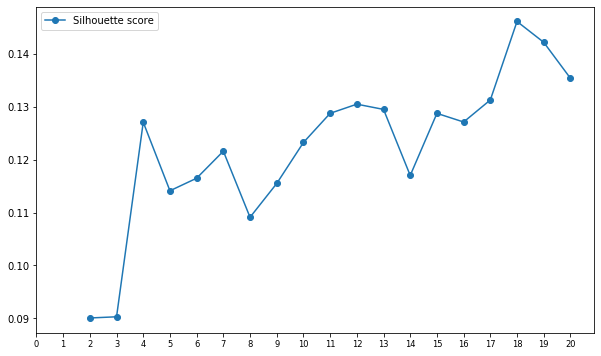

In [100]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouette_score_array = [None, None]
    
for i in range(2,21):
    km = KMeans(n_clusters=i, n_init=10)
    y_km = km.fit_predict(X)
    silhouette_score_array.append( silhouette_score(X,km.labels_) )
    
t=range(0,21)

plt.figure(figsize=(10,6));
plt.plot(silhouette_score_array, "o-", label="Silhouette score")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


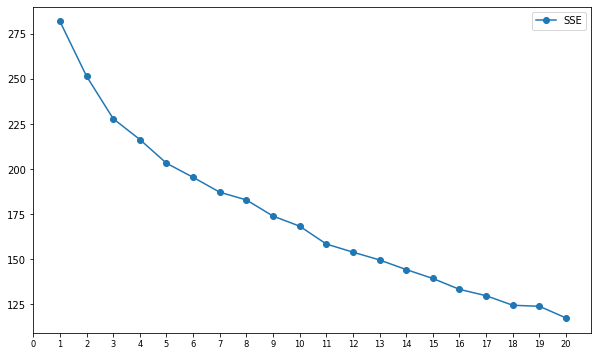

In [101]:
SSE_array = [None]
    
for i in range(1,21):
    km = KMeans(n_clusters=i, n_init=10)
    y_km = km.fit_predict(X)
    SSE_array.append(km.inertia_)
    
t=range(0,21)

plt.figure(figsize=(10,6));
plt.plot(SSE_array, "o-", label="SSE")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()    

In [107]:

cluster = KMeans(n_clusters=4, random_state = 42)
# slice matrix so we only include the 0/1 indicator columns in the clustering
df_transactions['cluster'] = cluster.fit_predict(X)

In [108]:
df_transactions.head()

,customer_name,offer_id,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,cluster
0,Adams,77,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,3
1,Allen,36,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Anderson,50,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,2
3,Bailey,37,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3
4,Baker,67,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Jakie są liczności grup?

In [109]:
df_transactions.cluster.value_counts()

0    36
1    28
3    20
2    16
Name: cluster, dtype: int64

Mozemy zwizualizować wynik na płaszczyźnie 
* t-SNE
* PCA

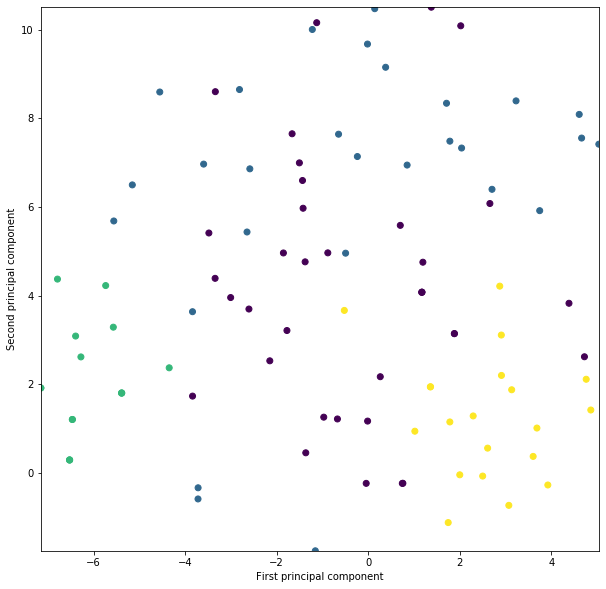

In [110]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
X_tsne = tsne.fit_transform(X)

from matplotlib import colors as mcolors
#colors = list(mcolors.CSS4_COLORS)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max())
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max())
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = cluster.labels_)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

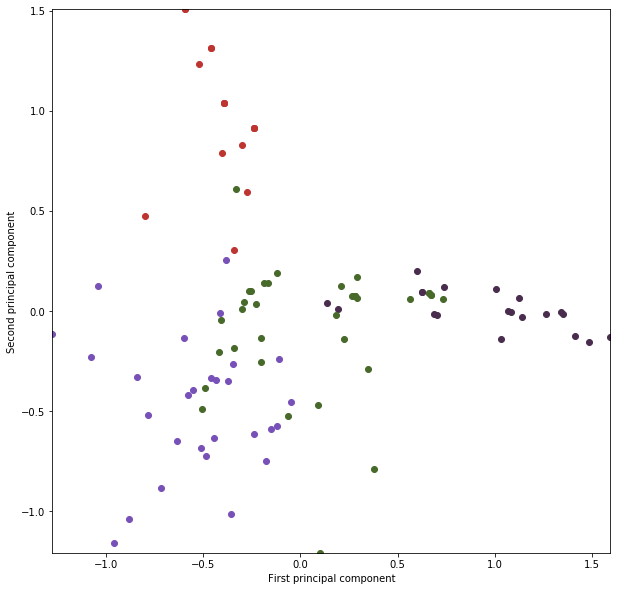

In [111]:
from sklearn.decomposition import PCA

# build a PCA model
pca = PCA(n_components=2)
pca.fit(X)
# transform the digits data onto the first two principal components
X_pca = pca.transform(X)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(X_pca[:, 0].min(), X_pca[:, 0].max())
plt.ylim(X_pca[:, 1].min(), X_pca[:, 1].max())
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.scatter(X_pca[i, 0], X_pca[i, 1], color = colors[cluster.labels_[i]])
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

Zanalizujmy ostatni klaster.

ZADANIE: Dla każdego wina wylistować ilość klientów które go kupili - z klastra 4 i z innych klastrów. 

In [112]:
df_transactions.head()

,customer_name,offer_id,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,cluster
0,Adams,77,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,3
1,Allen,36,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Anderson,50,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,2
3,Bailey,37,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3
4,Baker,67,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [113]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [114]:
df['is_4'] = df_transactions['cluster']==4
df.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n,is_4
0,1,January,Malbec,72,56,France,False,Thomas,1,False
1,1,January,Malbec,72,56,France,False,Jackson,1,False
2,1,January,Malbec,72,56,France,False,Mitchell,1,False
3,1,January,Malbec,72,56,France,False,Peterson,1,False
4,1,January,Malbec,72,56,France,False,Wood,1,False


In [115]:
df.groupby("is_4").varietal.value_counts()

is_4   varietal          
False  Prosecco              31
       Espumante             26
       Champagne             12
       Malbec                10
       Pinot Noir            10
       Chardonnay             7
       Cabernet Sauvignon     4
Name: varietal, dtype: int64

Które wino jest kupowane tylko przez ten klaster, a które wcale?

Spójrzmy na numeryczne atrybuty. Jak jest średnia ilości i rabatu?

In [116]:
df.groupby("is_4")[['min_qty', 'discount']].mean()

,min_qty,discount
is_4,,
False,67.14,47.65


Czy ci klienci kupują duże czy małe ilości?

In [117]:
df.groupby("is_4")[['min_qty', 'discount']].std()

,min_qty,discount
is_4,,
False,56.662927,17.732225
